# BITCOIN PRICE PREDICTION

In [1]:
# In this project we are trying to predict the price of bitcoin for 1 to n days in future

# Importing libraries and Fetching the Data

In [6]:
!pip install yfinance

In [5]:
!pip install --upgrade pip

In [7]:
import yfinance as yf
import pandas as pd
import os
import seaborn as sns
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
import matplotlib.pyplot as plt
from sklearn.metrics import precision_score
from sklearn.metrics import mean_absolute_error
from sklearn.metrics import mean_squared_error
from sklearn.preprocessing import PolynomialFeatures
import warnings
warnings.filterwarnings('ignore')
plt.style.use('bmh')

In [8]:
btc_ticker = yf.Ticker("BTC-USD")

In [9]:
if os.path.exists("btc.csv"):
    btc = pd.read_csv("btc.csv", index_col=0)
else:
    btc = btc_ticker.history(period="max")
    btc.to_csv("btc.csv")

In [10]:
btc.index = pd.to_datetime(btc.index).date

In [12]:
btc

,Open,High,Low,Close,Volume,Dividends,Stock Splits
2014-09-17,465.864014,468.174011,452.421997,457.334015,21056800,0.0,0.0
2014-09-18,456.859985,456.859985,413.104004,424.440002,34483200,0.0,0.0
2014-09-19,424.102997,427.834991,384.532013,394.795990,37919700,0.0,0.0
2014-09-20,394.673004,423.295990,389.882996,408.903992,36863600,0.0,0.0
2014-09-21,408.084991,412.425995,393.181000,398.821014,26580100,0.0,0.0
...,...,...,...,...,...,...,...
2024-02-12,48296.386719,50280.476562,47745.761719,49958.222656,34511985805,0.0,0.0
2024-02-13,49941.359375,50358.390625,48406.496094,49742.441406,35593051468,0.0,0.0
2024-02-14,49733.445312,52021.371094,49296.832031,51826.695312,39105608050,0.0,0.0
2024-02-15,51836.785156,52820.066406,51371.628906,51938.554688,38564360533,0.0,0.0


In [13]:
# removing unnecessary data

del btc["Dividends"]
del btc["Stock Splits"]

btc.columns = [c.lower() for c in btc.columns]

In [14]:
btc

,open,high,low,close,volume
2014-09-17,465.864014,468.174011,452.421997,457.334015,21056800
2014-09-18,456.859985,456.859985,413.104004,424.440002,34483200
2014-09-19,424.102997,427.834991,384.532013,394.795990,37919700
2014-09-20,394.673004,423.295990,389.882996,408.903992,36863600
2014-09-21,408.084991,412.425995,393.181000,398.821014,26580100
...,...,...,...,...,...
2024-02-12,48296.386719,50280.476562,47745.761719,49958.222656,34511985805
2024-02-13,49941.359375,50358.390625,48406.496094,49742.441406,35593051468
2024-02-14,49733.445312,52021.371094,49296.832031,51826.695312,39105608050
2024-02-15,51836.785156,52820.066406,51371.628906,51938.554688,38564360533


In [15]:
# make feature columns for predictions

btc["tomorrow"] = btc["close"].shift(-1)
btc["target"] = (btc["tomorrow"] > btc["close"]).astype(int)
btc["target"].value_counts()

target
1    1823
0    1617
Name: count, dtype: int64

In [16]:
btc

,open,high,low,close,volume,tomorrow,target
2014-09-17,465.864014,468.174011,452.421997,457.334015,21056800,424.440002,0
2014-09-18,456.859985,456.859985,413.104004,424.440002,34483200,394.795990,0
2014-09-19,424.102997,427.834991,384.532013,394.795990,37919700,408.903992,1
2014-09-20,394.673004,423.295990,389.882996,408.903992,36863600,398.821014,0
2014-09-21,408.084991,412.425995,393.181000,398.821014,26580100,402.152008,1
...,...,...,...,...,...,...,...
2024-02-12,48296.386719,50280.476562,47745.761719,49958.222656,34511985805,49742.441406,0
2024-02-13,49941.359375,50358.390625,48406.496094,49742.441406,35593051468,51826.695312,1
2024-02-14,49733.445312,52021.371094,49296.832031,51826.695312,39105608050,51938.554688,1
2024-02-15,51836.785156,52820.066406,51371.628906,51938.554688,38564360533,51962.457031,1


In [17]:
def correlation(data, threshold):
    corr = data.corr()['tomorrow'].sort_values(ascending=False)[1:]
    abs_corr = abs(corr)
    relevant_features = abs_corr[abs_corr>threshold]
    return relevant_features

In [18]:
corr_features = correlation(btc,0.81)
corr_features

close    0.998853
high     0.998353
low      0.998213
open     0.997760
Name: tomorrow, dtype: float64

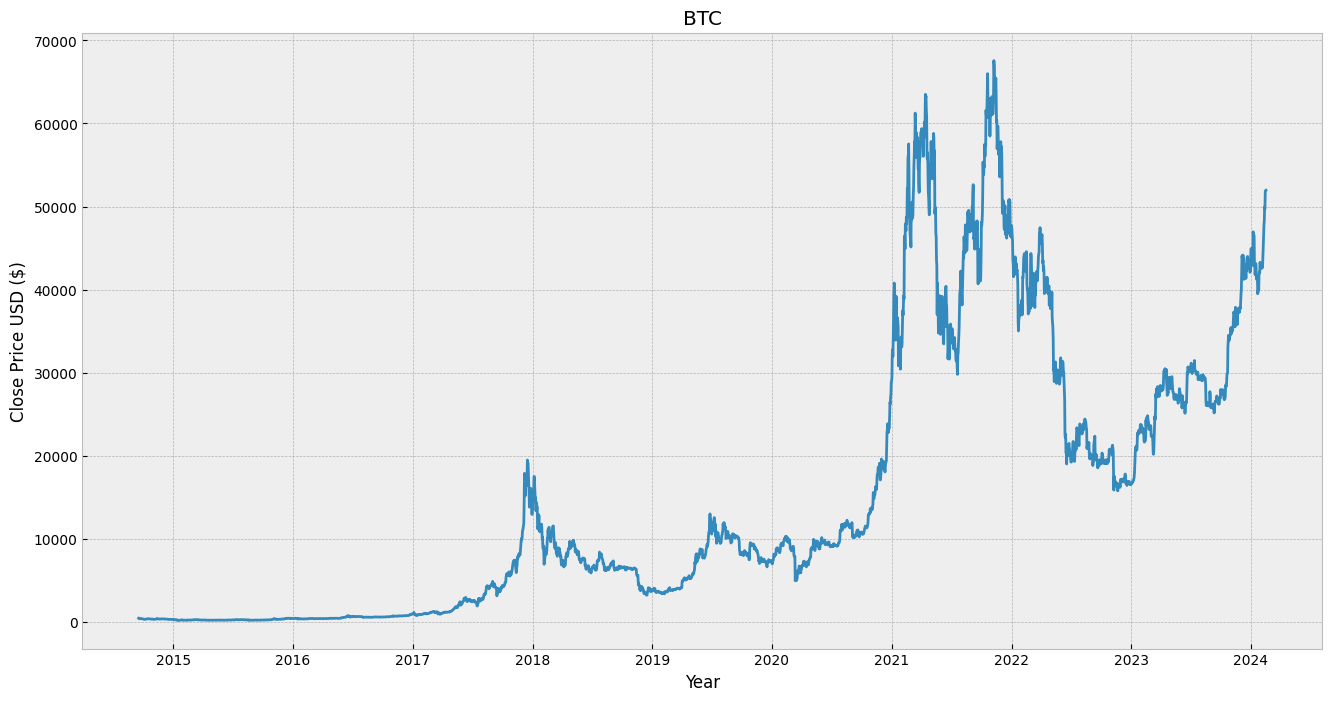

In [19]:
plt.figure(figsize=(16,8))
plt.title('BTC')
plt.xlabel('Year')
plt.ylabel('Close Price USD ($)')
plt.plot(btc['close'])
plt.show()

# Simple Linear Regression

In [20]:
train = btc.iloc[:-500]
test = btc.iloc[-500:]

In [21]:
lr = LinearRegression()

predictors = ["close"]
lr.fit(train[predictors], train["target"])

preds = lr.predict(test[predictors])
preds = pd.Series(preds, index=test.index)
for i in range(len(preds)):
    if preds.iloc[i]>=0.5:
        preds.iloc[i] = 1
    else:
        preds.iloc[i] = 0
print('Accuracy: ',precision_score(test["target"], preds))
score = mean_absolute_error(test["target"], preds)
print("The Mean Absolute Error of our Model is {}".format(round(score, 2)))
score = mean_squared_error(test["target"], preds)
print("The Mean Squared Error of our Model is {}".format(round(score, 2)))
score = np.sqrt(mean_squared_error(test["target"], preds))
print("The Root Mean Squared Error of our Model is {}".format(round(score, 2)))

Accuracy:  0.4786729857819905
The Mean Absolute Error of our Model is 0.53
The Mean Squared Error of our Model is 0.53
The Root Mean Squared Error of our Model is 0.73


Predicted Price For Tomorrow: 51919.83849818579
Do not buy


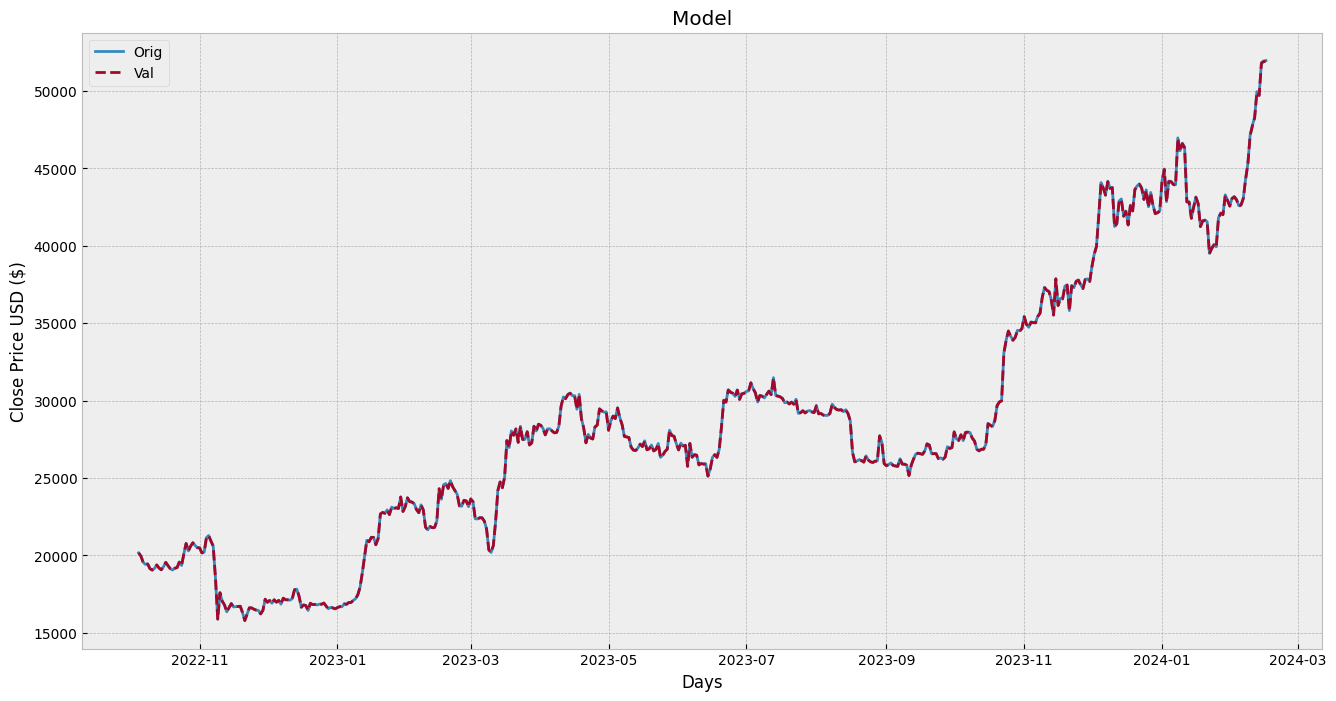

In [22]:
lr = LinearRegression().fit(train[predictors], train['tomorrow'])
lr_prediction = lr.predict(test[predictors])
print(f'Predicted Price For Tomorrow: {lr_prediction[-1]}')
if preds.iloc[-1] == 0:
    print('Do not buy')
else:
    print('Buy')

predictions = lr_prediction
valid = btc[-500:]
valid['Predictions'] = predictions
plt.figure(figsize=(16,8))
plt.title('Model')
plt.xlabel('Days')
plt.ylabel('Close Price USD ($)')
plt.plot(btc['close'][-500:])
plt.plot(valid[['Predictions']][-500:],linestyle='dashed')
plt.legend(['Orig','Val','Pred'])
plt.show()

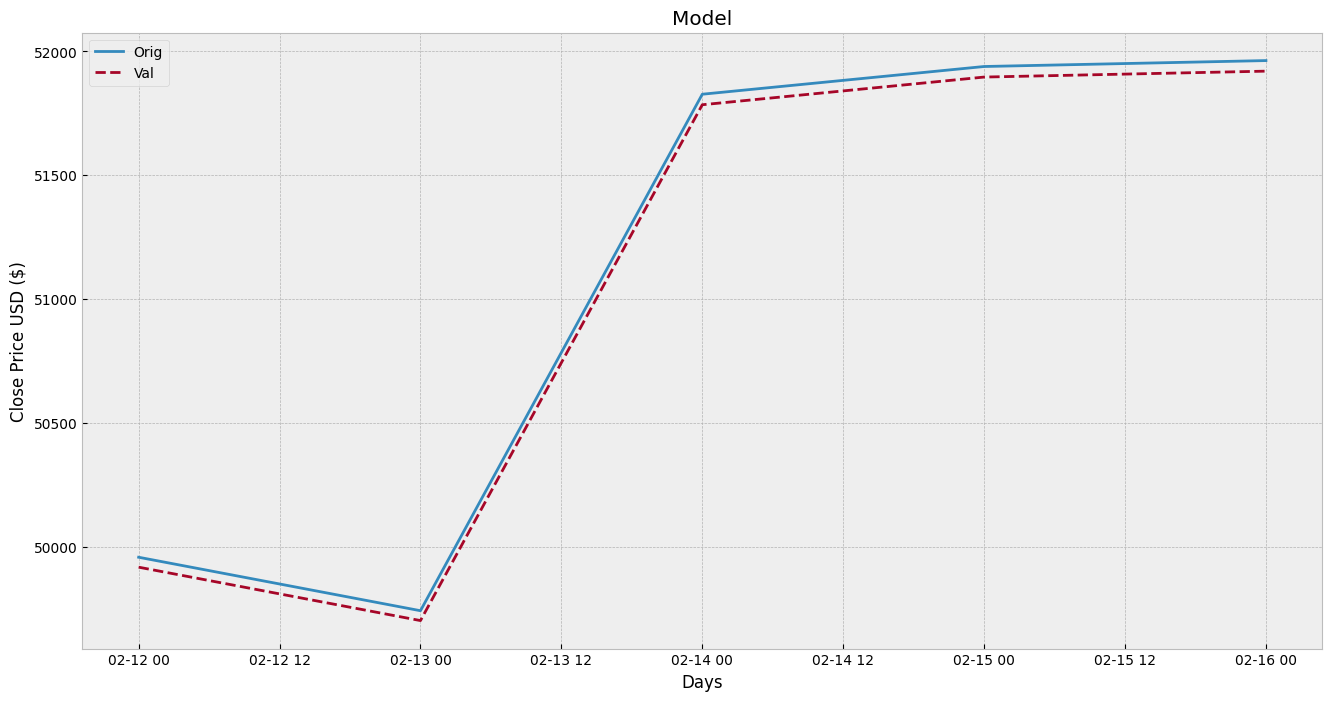

In [23]:
plt.figure(figsize=(16,8))
plt.title('Model')
plt.xlabel('Days')
plt.ylabel('Close Price USD ($)')
plt.plot(btc['close'][-5:])
plt.plot(valid[['Predictions']][-5:],linestyle='dashed')
plt.legend(['Orig','Val','Pred'])
plt.show()

# Multiple Linear Regression

Accuracy:  0.5
The Mean Absolute Error of our Model is 0.49
The Mean Squared Error of our Model is 0.49
The Root Mean Squared Error of our Model is 0.7
Predicted Price For Tomorrow: 51845.82773860532
Do not buy


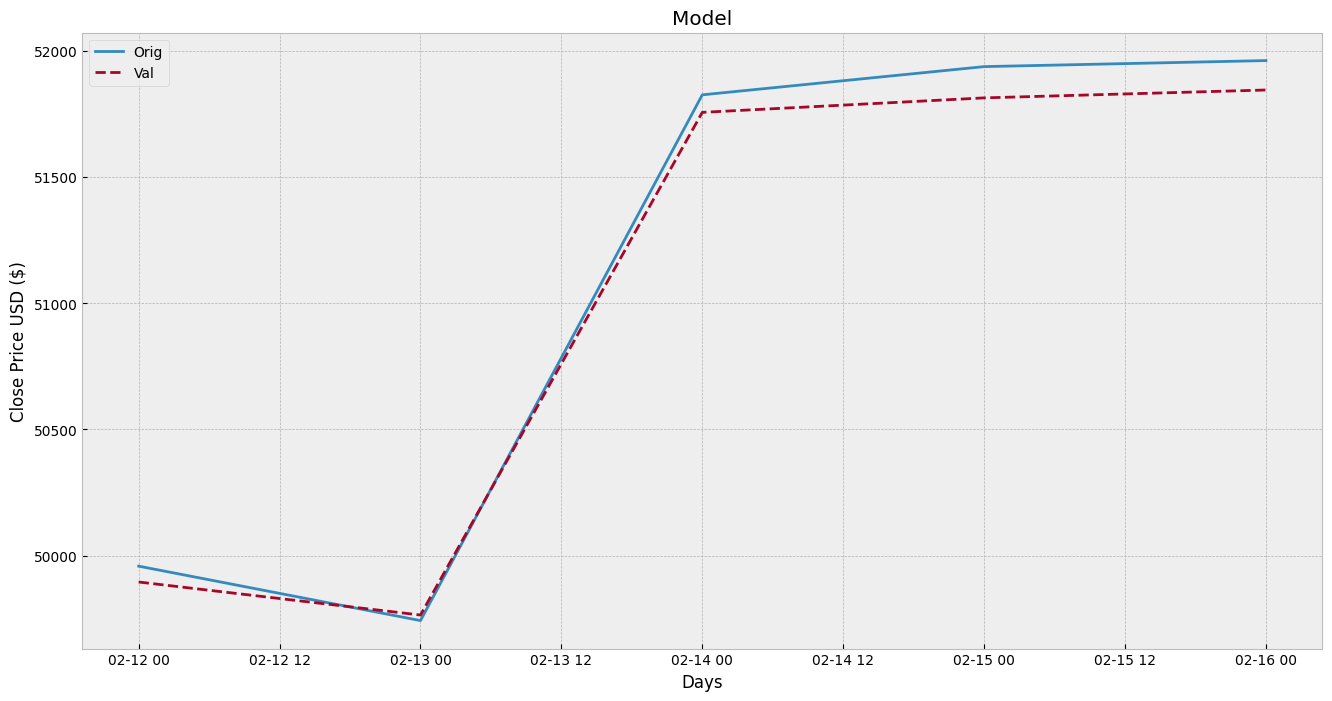

In [24]:
lr = LinearRegression()

predictors = ["close", "open", "high", "low"]
lr.fit(train[predictors], train["target"])

preds = lr.predict(test[predictors])
preds = pd.Series(preds, index=test.index)
for i in range(len(preds)):
    if preds.iloc[i]>=0.5:
        preds.iloc[i] = 1
    else:
        preds.iloc[i] = 0
print('Accuracy: ',precision_score(test["target"], preds))
score = mean_absolute_error(test["target"], preds)
print("The Mean Absolute Error of our Model is {}".format(round(score, 2)))
score = mean_squared_error(test["target"], preds)
print("The Mean Squared Error of our Model is {}".format(round(score, 2)))
score = np.sqrt(mean_squared_error(test["target"], preds))
print("The Root Mean Squared Error of our Model is {}".format(round(score, 2)))

lr = LinearRegression().fit(train[predictors], train['tomorrow'])

lr_prediction = lr.predict(test[predictors])
print(f'Predicted Price For Tomorrow: {lr_prediction[-1]}')
if preds.iloc[-1] == 0:
    print('Do not buy')
else:
    print('Buy')

predictions = lr_prediction
valid = btc[-500:]
valid['Predictions'] = predictions
plt.figure(figsize=(16,8))
plt.title('Model')
plt.xlabel('Days')
plt.ylabel('Close Price USD ($)')
plt.plot(btc['close'][-5:])
plt.plot(valid[['Predictions']][-5:],linestyle='dashed')
plt.legend(['Orig','Val','Pred'])
plt.show()

# Polynomial Regression

Accuracy:  0.6559139784946236
The Mean Absolute Error of our Model is 0.44
The Mean Squared Error of our Model is 0.44
The Root Mean Squared Error of our Model is 0.66
Predicted Price For Tomorrow: 51845.82773860532
Do not buy


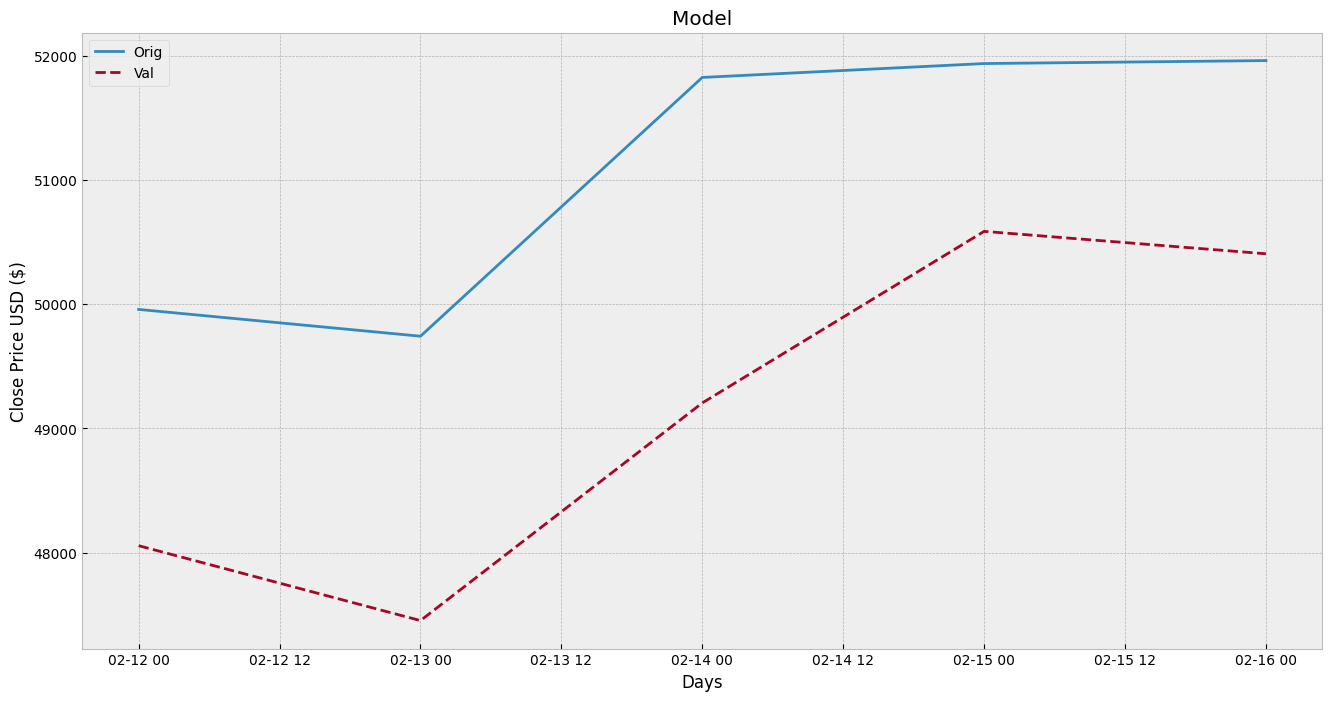

In [25]:
predictors = ["close", "open", "high", "low"]
poly = PolynomialFeatures(degree=4)
X_poly = poly.fit_transform(train[predictors])
poly.fit(X_poly, train["target"])
lin2 = LinearRegression()
lin2.fit(X_poly, train["target"])
preds = lin2.predict(poly.fit_transform(test[predictors]))

preds = pd.Series(preds, index=test.index)
for i in range(len(preds)):
    if preds.iloc[i]>=0.5:
        preds.iloc[i] = 1
    else:
        preds.iloc[i] = 0
print('Accuracy: ',precision_score(test["target"], preds))
score = mean_absolute_error(test["target"], preds)
print("The Mean Absolute Error of our Model is {}".format(round(score, 2)))
score = mean_squared_error(test["target"], preds)
print("The Mean Squared Error of our Model is {}".format(round(score, 2)))
score = np.sqrt(mean_squared_error(test["target"], preds))
print("The Root Mean Squared Error of our Model is {}".format(round(score, 2)))


predictors = ["close", "open", "high", "low"]
poly = PolynomialFeatures(degree=4)
X_poly = poly.fit_transform(train[predictors])
 
poly.fit(X_poly, train["tomorrow"])
lin2 = LinearRegression()
lin2.fit(X_poly, train["tomorrow"])
predictions = lin2.predict(poly.fit_transform(test[predictors]))

print(f'Predicted Price For Tomorrow: {lr_prediction[-1]}')
if preds.iloc[-1] == 0:
    print('Do not buy')
else:
    print('Buy')
    
valid = btc[-500:]
valid['Predictions'] = predictions
plt.figure(figsize=(16,8))
plt.title('Model')
plt.xlabel('Days')
plt.ylabel('Close Price USD ($)')
plt.plot(btc['close'][-5:])
plt.plot(valid[['Predictions']][-5:],linestyle='dashed')
plt.legend(['Orig','Val','Pred'])
plt.show()

# Decision Tree

In [26]:
from sklearn.tree import DecisionTreeRegressor
from sklearn.metrics import accuracy_score

Accuracy:  0.48
Predicted Price For Tomorrow: 36040.921875
Buy


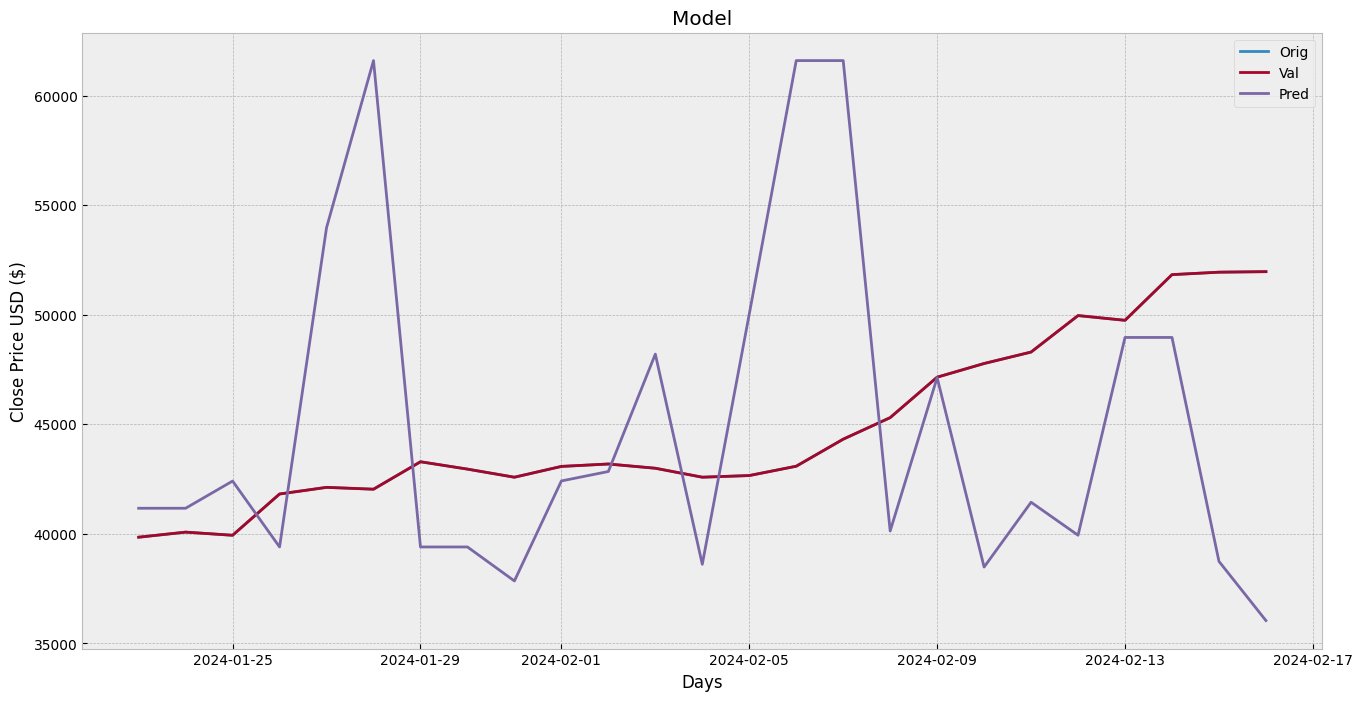

In [27]:
predictors = ['close']
df = btc[predictors]
# df = df.to_frame()

future_days = 25
# creating target data column
df['Prediction'] = btc['target']

X = np.array(df.drop(['Prediction'], axis=1))[:-future_days]
y = np.array(df['Prediction'])[:-future_days]

X_train = X[:-200]
X_test = X[-200:]
y_train = y[:-200]
y_test = y[-200:]

tree = DecisionTreeRegressor().fit(X_train, y_train)

x_future = df.drop(['Prediction'], axis= 1)[:-future_days]
x_future = x_future.tail(future_days)
x_future = np.array(x_future)

preds = tree.predict(x_future)

print('Accuracy: ',accuracy_score(y_test[-25:], preds))

df = btc['close']
df = df.to_frame()

future_days = 25
# creating target data column
df['Prediction'] = df[['close']].shift(-future_days)

X = np.array(df.drop(['Prediction'], axis=1))[:-future_days]
y = np.array(df['Prediction'])[:-future_days]

X_train = X[:-200]
X_test = X[-200:]
y_train = y[:-200]
y_test = y[-200:]

tree = DecisionTreeRegressor().fit(X_train, y_train)

x_future = df.drop(['Prediction'], axis= 1)[:-future_days]
x_future = x_future.tail(future_days)
x_future = np.array(x_future)

tree_prediction = tree.predict(x_future)

print(f'Predicted Price For Tomorrow: {tree_prediction[-1]}')

if preds[-1] == 0:
    print('Do not buy')
else:
    print('Buy')


predictions = tree_prediction
valid = df[-future_days:]
valid['Predictions'] = predictions
plt.figure(figsize=(16,8))
plt.title('Model')
plt.xlabel('Days')
plt.ylabel('Close Price USD ($)')
plt.plot(df['close'][-future_days:])
plt.plot(valid[['close', 'Predictions']])
plt.legend(['Orig', 'Val','Pred'])
plt.show()

# SVM

In [28]:
X = np.array(btc[['close']])
X = X[:-1]

y = np.array(btc[['tomorrow']])
y = y[:-1]


In [29]:
from sklearn.model_selection import train_test_split
# x_train, x_test, y_train, y_test = train_test_split(X, y, test_size=0.2)
x_train = X[:-500]
x_test = X[-500:]
y_train = y[:-500]
y_test = y[-500:]

In [30]:
from sklearn.svm import SVR
svr_rbf = SVR(kernel='rbf', C=1e3, gamma=0.00001)
svr_rbf.fit(x_train, y_train)

SVR(C=1000.0, gamma=1e-05)

Accuracy:  0.7495054981003693
Prediction for Today 22 Nov. 2023: 28074.88585899238
Do not Buy


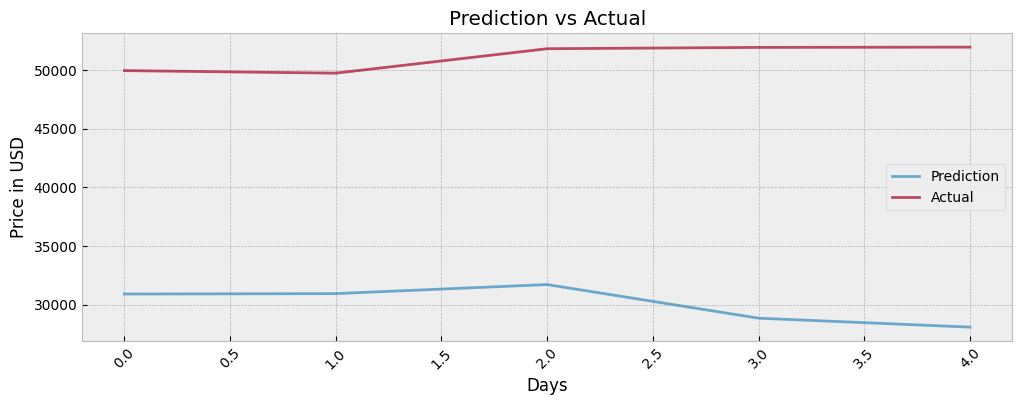

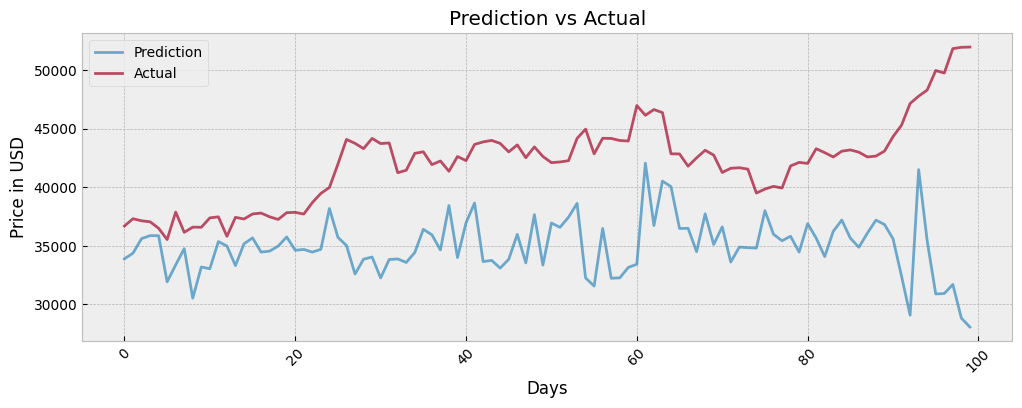

In [31]:
svr_rbf_confidence = svr_rbf.score(x_test, y_test)
print('Accuracy: ', svr_rbf_confidence)

svm_prediction = svr_rbf.predict(x_test)

print(f'Prediction for Today 22 Nov. 2023: {svm_prediction[-1]}')

if(btc['close'][-1]<svm_prediction[-1]):
    print('Buy')
else:
    print('Do not Buy')

plt.figure(figsize=(12,4))
plt.plot(svm_prediction[-5:], label='Prediction', lw=2, alpha=.7)
plt.plot(y_test[-5:], label='Actual', lw=2, alpha=.7)
plt.title('Prediction vs Actual')
plt.ylabel('Price in USD')
plt.xlabel('Days')
plt.legend()
plt.xticks(rotation=45)
plt.show()

plt.figure(figsize=(12,4))
plt.plot(svm_prediction[-100:], label='Prediction', lw=2, alpha=.7)
plt.plot(y_test[-100:], label='Actual', lw=2, alpha=.7)
plt.title('Prediction vs Actual')
plt.ylabel('Price in USD')
plt.xlabel('Days')
plt.legend()
plt.xticks(rotation=45)
plt.show()

# Random Forest

In [32]:
from sklearn.ensemble import RandomForestClassifier

model = RandomForestClassifier(n_estimators=100, min_samples_split=50, random_state=1)

train = btc.iloc[:-200]
test = btc.iloc[-200:]

predictors = ["close", "open", "high", "low"]
model.fit(train[predictors], train["target"])
preds = model.predict(test[predictors])
preds = pd.Series(preds, index=test.index)

print('Accuracy: ', precision_score(test["target"], preds))

if preds[-1] == 0:
    print('Do not buy')
else:
    print('Buy')

Accuracy:  0.5258620689655172
Buy


Prediction for tomorrow:  52607.245120855194


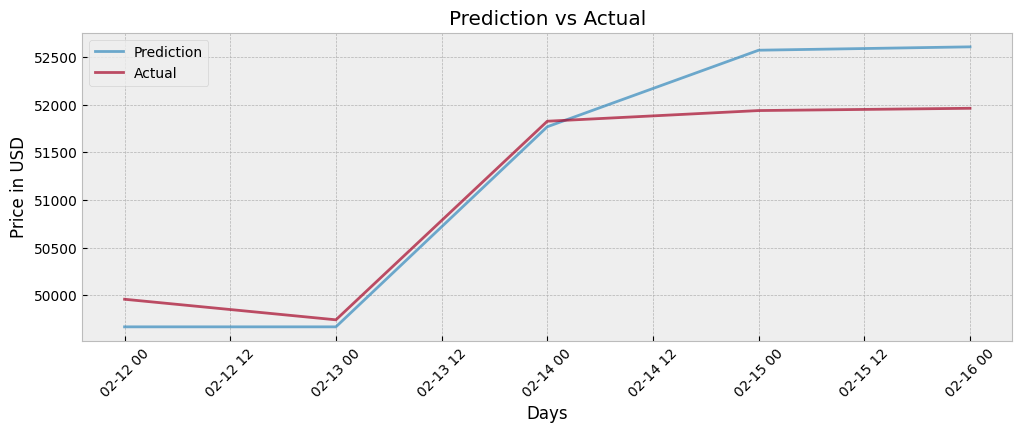

In [33]:
from sklearn.ensemble import RandomForestRegressor

model = RandomForestRegressor(n_estimators=100, min_samples_split=50, random_state=1)

train = btc.iloc[:-200]
test = btc.iloc[-200:]

predictors = ["close", "open", "high", "low"]
model.fit(train[predictors], train["tomorrow"])
preds = model.predict(test[predictors])
preds = pd.Series(preds, index=test.index)
print('Prediction for tomorrow: ', preds[-1])
plt.figure(figsize=(12,4))
plt.plot(preds[-5:], label='Prediction', lw=2, alpha=.7)
plt.plot(test['close'][-5:], label='Actual', lw=2, alpha=.7)
plt.title('Prediction vs Actual')
plt.ylabel('Price in USD')
plt.xlabel('Days')
plt.legend()
plt.xticks(rotation=45)
plt.show()

# Decision Tree with multiple features

Accuracy:  0.68
Predicted Price For Tomorrow: 36040.921875
Do not buy


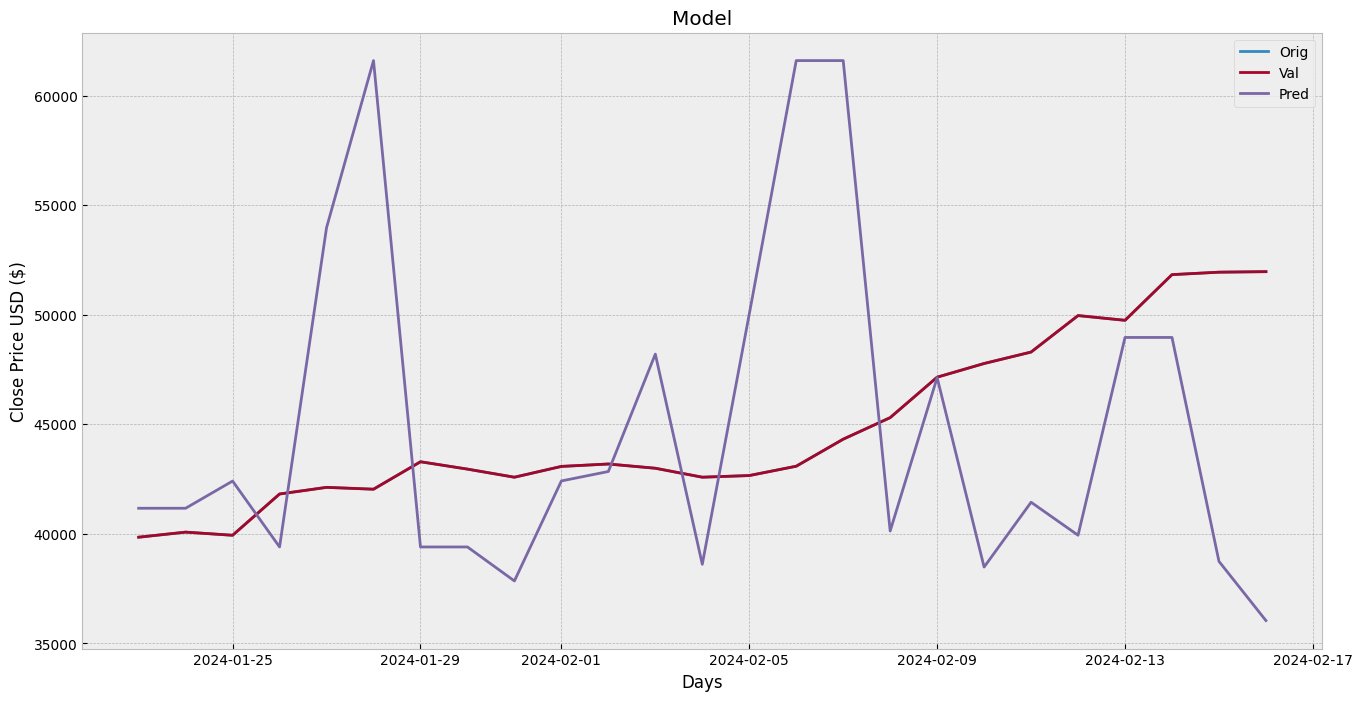

In [34]:
predictors = ['close','high','low','open']
df = btc[predictors]
# df = df.to_frame()

future_days = 25
# creating target data column
df['Prediction'] = btc['target']

X = np.array(df.drop(['Prediction'], axis=1))[:-future_days]
y = np.array(df['Prediction'])[:-future_days]

X_train = X[:-200]
X_test = X[-200:]
y_train = y[:-200]
y_test = y[-200:]

tree = DecisionTreeRegressor().fit(X_train, y_train)

x_future = df.drop(['Prediction'], axis= 1)[:-future_days]
x_future = x_future.tail(future_days)
x_future = np.array(x_future)

preds = tree.predict(x_future)

print('Accuracy: ',accuracy_score(y_test[-25:], preds))

df = btc['close']
df = df.to_frame()

future_days = 25
# creating target data column
df['Prediction'] = df[['close']].shift(-future_days)

X = np.array(df.drop(['Prediction'], axis=1))[:-future_days]
y = np.array(df['Prediction'])[:-future_days]

X_train = X[:-200]
X_test = X[-200:]
y_train = y[:-200]
y_test = y[-200:]

tree = DecisionTreeRegressor().fit(X_train, y_train)

x_future = df.drop(['Prediction'], axis= 1)[:-future_days]
x_future = x_future.tail(future_days)
x_future = np.array(x_future)

tree_prediction = tree.predict(x_future)

print(f'Predicted Price For Tomorrow: {tree_prediction[-1]}')

if preds[-1] == 0:
    print('Do not buy')
else:
    print('Buy')


predictions = tree_prediction
valid = df[-future_days:]
valid['Predictions'] = predictions
plt.figure(figsize=(16,8))
plt.title('Model')
plt.xlabel('Days')
plt.ylabel('Close Price USD ($)')
plt.plot(df['close'][-future_days:])
plt.plot(valid[['close', 'Predictions']])
plt.legend(['Orig', 'Val','Pred'])
plt.show()